In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Global rng instance
rng = np.random.RandomState(42)

# To show all output columns
pd.options.display.max_columns = None 

warnings.filterwarnings("ignore", category=UserWarning)

import os
for dirname, _, filenames in os.walk('Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Datasets/train_data.csv
Datasets/sample.csv
Datasets/test_data.csv


# Load Data

## Load raw data from CSV files

In [54]:
data_train_raw = pd.read_csv('Datasets/train_data.csv')
data_test_raw  = pd.read_csv('Datasets/test_data.csv')

datasets = [data_train_raw.copy(), data_test_raw.copy()] # given pandas df's

target_id      = 'id'
target_feature = 'Offer Accepted'

## Show some basic info about given dataset

In [55]:
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

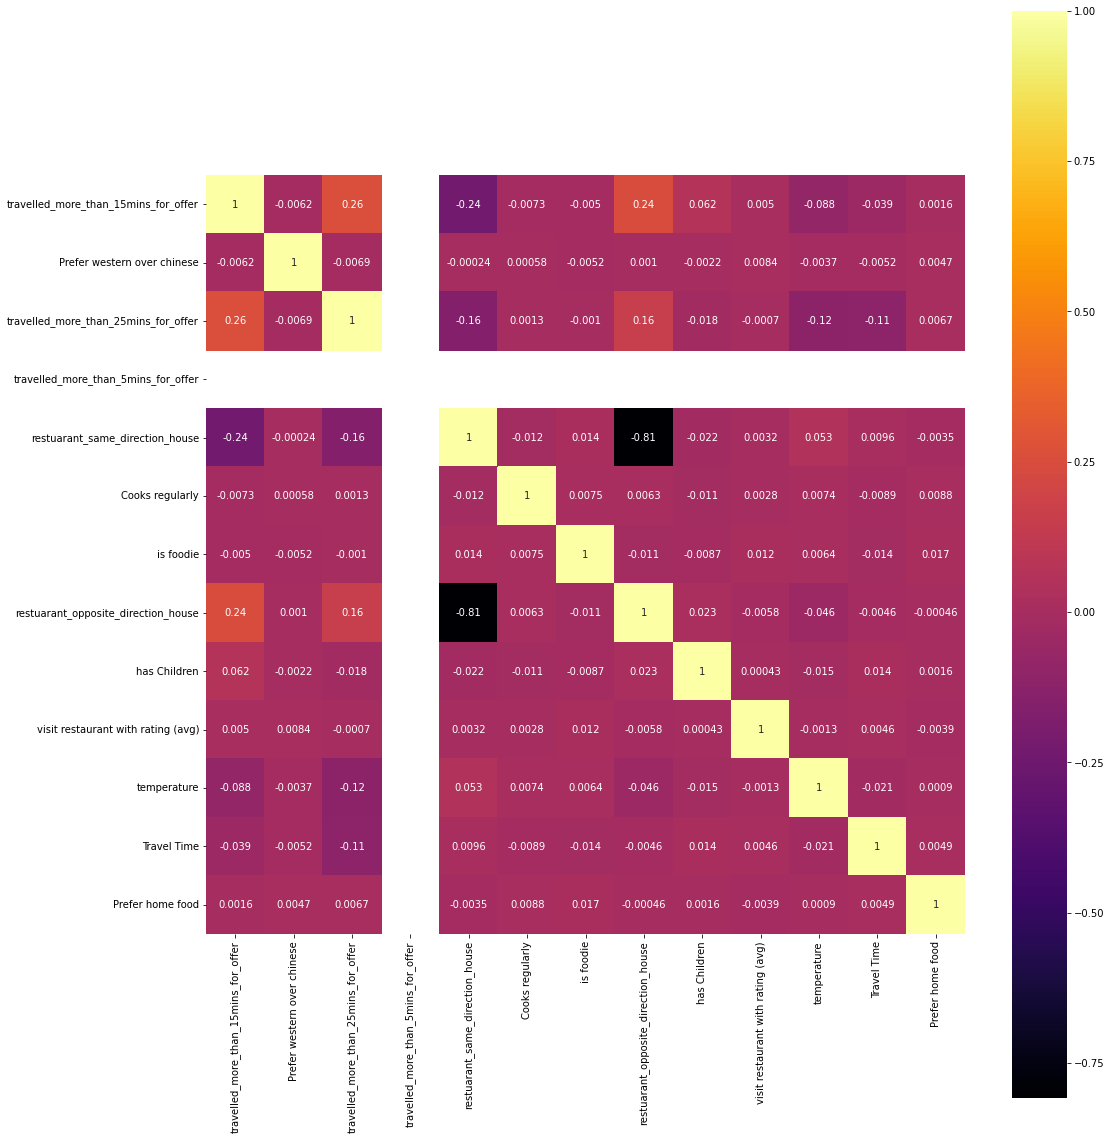

In [56]:
data_corr = datasets[0].corr()
plt.figure(figsize=(17, 20))
sns.heatmap(data_corr, annot=True, square=True, cmap="inferno")
plt.show()

#data_corr['Offer Accepted']*100 

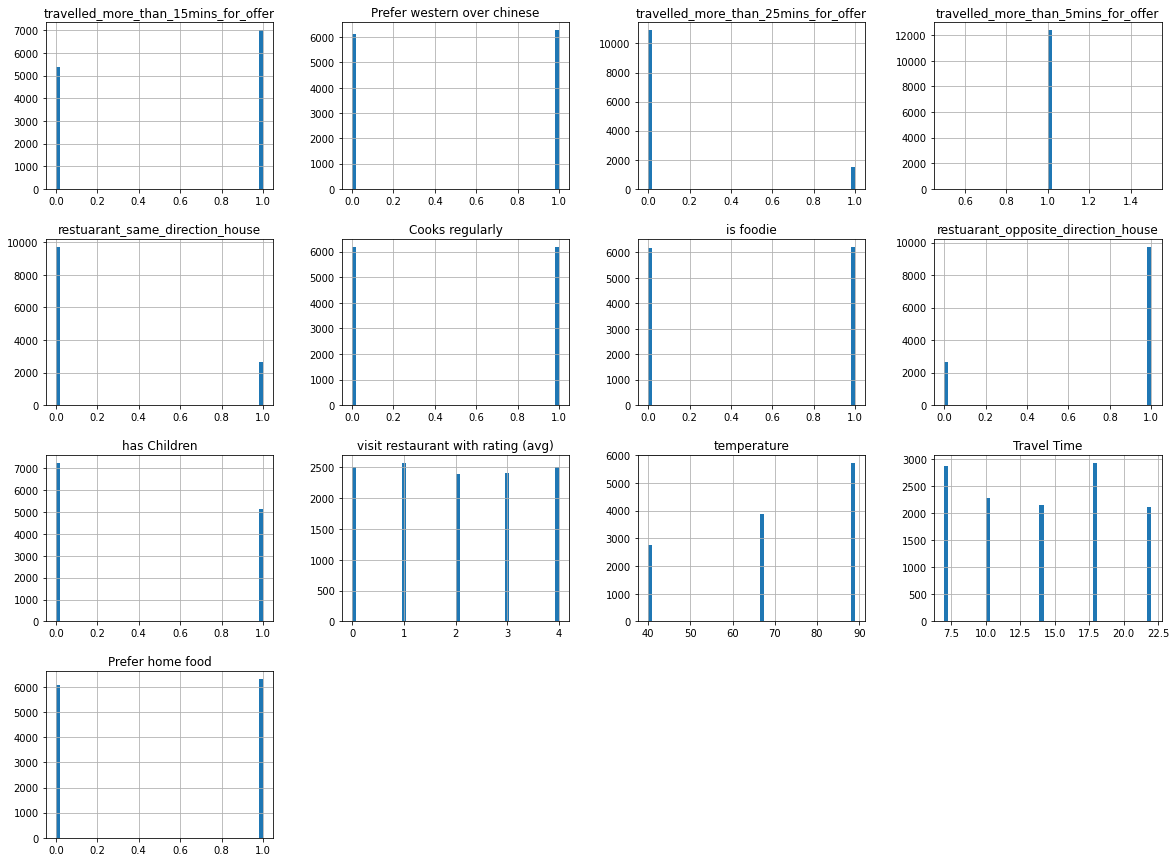

In [57]:
datasets[0].hist(bins=50, figsize=(20, 15))
plt.show()

In [58]:
data_train_raw.sample(n=10, random_state=42)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,no_visited_bars,gender,car,restuarant_same_direction_house,Cooks regularly,Customer type,Qualification,is foodie,no_Take-aways,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
2442,2days,₹37500 - ₹49999,less1,1,1~3,Married partner,4 star restaurant,46,0,0,1,less1,Male,NaN,1,0,With Family,Bachelors degree,0,1~3,Healthcare Practitioners & Technical,0,1,1,89,never,7,Winter,Location C,0,Yes
970,10hours,₹100000 or More,1~3,1,less1,Single,Restaurant with pub,21,1,0,1,less1,Male,NaN,0,0,Individual,Some college - no degree,0,1~3,Student,1,0,0,89,less1,14,Winter,Location B,1,Yes
5763,2days,₹75000 - ₹87499,4~8,0,1~3,Married partner,Restaurant with pub,41,0,0,1,less1,Male,NaN,0,1,With Family,Graduate degree (Masters or Doctorate),1,gt8,Computer & Mathematical,1,1,3,67,less1,18,Winter,Location A,0,Yes
6621,10hours,₹100000 or More,never,0,gt8,Married partner,Cold drinks,31,0,0,1,less1,Male,NaN,1,0,Individual,Bachelors degree,0,4~8,Business & Financial,0,1,1,89,less1,7,Summer,Location A,1,No
11410,10hours,₹50000 - ₹62499,less1,1,1~3,Married partner,Cold drinks,50plus,1,0,1,never,Male,NaN,0,0,Individual,Bachelors degree,0,less1,Personal Care & Service,1,0,1,89,less1,18,Spring,Location C,1,No
10440,10hours,Less than ₹12500,1~3,1,1~3,Married partner,Cold drinks,50plus,0,0,1,less1,Male,NaN,1,0,Individual,Bachelors degree,1,4~8,Student,0,0,0,89,less1,22,Winter,Location B,0,No
10836,10hours,₹25000 - ₹37499,never,0,less1,Unmarried partner,Restaurant with pub,below21,1,0,1,never,Female,NaN,1,1,With Family,Some college - no degree,1,1~3,Student,0,0,1,89,never,7,Summer,Location C,0,No
8522,10hours,₹37500 - ₹49999,NaN,0,1~3,Married partner,Cold drinks,36,0,0,1,less1,Female,NaN,1,1,With Kids,Bachelors degree,1,1~3,Education&Training&Library,0,1,4,67,1~3,7,Winter,Location B,0,No
749,2days,₹100000 or More,less1,1,4~8,Single,2 star restaurant,36,1,0,1,NaN,Male,NaN,0,0,Individual,Bachelors degree,1,gt8,Unemployed,1,0,0,67,1~3,10,Summer,Location A,0,Yes
12067,10hours,₹25000 - ₹37499,less1,0,less1,Married partner,Cold drinks,46,1,0,1,less1,Female,NaN,0,0,With Colleagues,Some college - no degree,0,1~3,Sales & Related,1,1,3,89,never,10,Summer,Location A,1,No


In [59]:
data_train_raw.isna().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

# Preprocessing

## Handling of Categorical Vairbales

In [60]:
for dataset in datasets:
    dataset.loc[(dataset['travelled_more_than_25mins_for_offer'] == 1), 'travel_more'] = 3
    dataset.loc[((dataset['travelled_more_than_15mins_for_offer'] == 1) & (dataset['travelled_more_than_25mins_for_offer'] == 0) & (dataset['travelled_more_than_5mins_for_offer'] == 1)), 'travel_more'] = 2
    dataset.loc[(((dataset['travelled_more_than_5mins_for_offer'] == 1) & dataset['travelled_more_than_15mins_for_offer'] == 0) & (dataset['travelled_more_than_25mins_for_offer'] == 0)), 'travel_more'] = 1

## Dropping Unnecessary Columns

In [61]:
def dropcol(field):
    for dataset in datasets:
        dataset.drop([field], axis=1, inplace=True)

for i in ['travelled_more_than_25mins_for_offer', 'travelled_more_than_15mins_for_offer', 'travelled_more_than_5mins_for_offer', 
          'Prefer western over chinese', 'Cooks regularly', 'is foodie', 'visit restaurant with rating (avg)', 
          'Prefer home food', 'car', 'restuarant_same_direction_house', 'Restaur_spend_less_than20', 'has Children']: 
    dropcol(i)

## Label Encoder

In [62]:
'''
for dataset in datasets:
    dataset['offer expiration'] = dataset['offer expiration'].apply(lambda x: 0 if x == '10hours' else 1)
'''
datasets[0]['Offer Accepted'] = datasets[0]['Offer Accepted'].apply(lambda x: 0 if x == 'No' else 1)

from sklearn.preprocessing import LabelEncoder

def EncLabel(field):
    label = LabelEncoder()
    label.fit(datasets[0][field])
    
    for dataset in datasets:
        dataset[field] = label.transform(dataset[field])

#EncLabel('offer expiration')

## Ordinal Encoder

In [63]:
from sklearn.preprocessing import OrdinalEncoder

def EncOrdinal(field,values=None):
    if values:
        ordinal = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan, categories=[values])
    else:
        ordinal = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)

    ordinal.fit(datasets[0][[field]])

    for dataset in datasets:
        dataset[field] = ordinal.transform(dataset[[field]])
        
EncOrdinal('income_range', ['Less than ₹12500', '₹12500 - ₹24999', '₹25000 - ₹37499', '₹37500 - ₹49999', '₹50000 - ₹62499', '₹62500 - ₹74999', '₹75000 - ₹87499', '₹87500 - ₹99999', '₹100000 or More'])
EncOrdinal('age', ['below21', '21', '26', '31', '36', '41', '46','50plus'])
EncOrdinal('Restaur_spend_greater_than20', ['never', 'less1', '1~3', '4~8', 'gt8'])
EncOrdinal('no_visited_Cold drinks', ['never', 'less1', '1~3', '4~8', 'gt8'])
EncOrdinal('no_visited_bars', ['never', 'less1', '1~3', '4~8', 'gt8'])
EncOrdinal('no_Take-aways', ['never', 'less1', '1~3', '4~8', 'gt8'])
EncOrdinal('Marital Status')
#EncOrdinal()
#EncOrdinal('Restaur_spend_less_than20', ['never', 'less1', '1~3', '4~8', 'gt8'])

## One Hot Encoding

In [64]:
def OneHot(field):
    dummies = pd.get_dummies(datasets[0][[field]])
    
    for dataset in datasets:
        dataset.drop(field, axis=1, inplace=True)
        dataset[dummies.columns] = dummies

#OneHot('Climate')

## Binning

In [65]:
'''
    # Continuous variables (binning)
    dataset['AgeBin'] = pd.cut(dataset['age'].astype(int), 5)
    dataset.drop(['age'], axis=1, inplace=True)
'''

"\n    # Continuous variables (binning)\n    dataset['AgeBin'] = pd.cut(dataset['age'].astype(int), 5)\n    dataset.drop(['age'], axis=1, inplace=True)\n"

## Binary Encoding

In [66]:
def BinEnc(field, df, values=None):
    vals = df[field].value_counts().keys()
    no_vals = len(vals)
    no_cols = no_vals.bit_length()
    if values:
        ordinal = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan, categories=[values])
    else:
        ordinal = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
    ordinal.fit(df[[field]])
    df[field] = ordinal.transform(df[[field]])
    bin_no = []
    d = {}
    for k in range(no_cols):
        f = field+"_"+str(k)
        d[f] = []

    for i in range(len(df[field])):
        j = df[field][i]
        bin_j = bin(int(j))[2:]
        diff = no_cols - len(bin_j)
        bin_j = "0" * diff + str(bin_j)
        bin_no.append(bin_j)

        for k in range(no_cols):
            f = field+"_"+str(k)
            d[f].append(int(bin_j[k]))

    for i in d.keys():
        df[i] = d[i]
    df.drop(field, inplace=True, axis=1)
    return df

In [67]:
for dataset in datasets:
    for field in ['drop location', 'Customer type', 'Climate', 'temperature', 'restaurant type',
            'offer expiration', 'gender', 'Job/Job Industry']:
        dataset = BinEnc(field, dataset)
    dataset = BinEnc('Qualification', dataset, ['Some High School', 'High School Graduate','Some college - no degree','Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)'])

## Drop some Binary Encoded columns

In [68]:
for i in ['Customer type_0','offer expiration_0', 'gender_0' , 'Job/Job Industry_1']:
    dropcol(i)

In [69]:
datasets[0].sample(10, random_state=42)

,income_range,no_visited_Cold drinks,Marital Status,age,no_visited_bars,no_Take-aways,restuarant_opposite_direction_house,Restaur_spend_greater_than20,Travel Time,Offer Accepted,travel_more,drop location_0,drop location_1,Customer type_1,Customer type_2,Climate_0,Climate_1,temperature_0,temperature_1,restaurant type_0,restaurant type_1,restaurant type_2,offer expiration_1,gender_1,Job/Job Industry_0,Job/Job Industry_2,Job/Job Industry_3,Job/Job Industry_4,Qualification_0,Qualification_1,Qualification_2
2442,3.0,1.0,1.0,6.0,1.0,2.0,0,0.0,7,1,2.0,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0
970,8.0,2.0,2.0,1.0,1.0,2.0,1,1.0,14,1,2.0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0
5763,6.0,3.0,1.0,5.0,1.0,4.0,1,1.0,18,1,1.0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1
6621,8.0,0.0,1.0,3.0,1.0,3.0,0,1.0,7,0,1.0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0
11410,4.0,1.0,1.0,7.0,0.0,1.0,1,1.0,18,0,2.0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0
10440,0.0,2.0,1.0,7.0,1.0,3.0,0,1.0,22,0,2.0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0
10836,2.0,0.0,3.0,0.0,0.0,2.0,0,0.0,7,0,1.0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0
8522,3.0,NaN,1.0,4.0,1.0,2.0,0,2.0,7,0,1.0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0
749,8.0,1.0,2.0,4.0,NaN,4.0,1,2.0,10,1,2.0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0
12067,2.0,1.0,1.0,6.0,1.0,2.0,1,0.0,10,0,1.0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0


## Duplicate Row Elimination

In [70]:
print('Duplicate rows:', datasets[0].duplicated().value_counts())
datasets[0].drop_duplicates(inplace=True)

Duplicate rows: False    12365
True        14
dtype: int64


## Split into features and label

In [71]:
X_train = datasets[0].drop('Offer Accepted', axis=1, inplace=False)
y_train = datasets[0][['Offer Accepted']]
features = X_train.columns
X_test = datasets[1]

In [72]:
X_train.isna().sum()

income_range                             0
no_visited_Cold drinks                 197
Marital Status                           0
age                                      0
no_visited_bars                         93
no_Take-aways                          144
restuarant_opposite_direction_house      0
Restaur_spend_greater_than20           160
Travel Time                              0
travel_more                              0
drop location_0                          0
drop location_1                          0
Customer type_1                          0
Customer type_2                          0
Climate_0                                0
Climate_1                                0
temperature_0                            0
temperature_1                            0
restaurant type_0                        0
restaurant type_1                        0
restaurant type_2                        0
offer expiration_1                       0
gender_1                                 0
Job/Job Ind

## Impute NaN values

### KNN Imputer

In [73]:
'''
from sklearn.impute import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)
'''

'\nfrom sklearn.impute import KNNImputer\nimputer = KNNImputer()\n\nX_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)\nX_test  = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)\n'

### Simple Imputer

In [74]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train = pd.DataFrame(imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)


## Outlier Elimination

In [75]:
from sklearn.neighbors import LocalOutlierFactor

df = pd.concat([X_train, y_train], axis=1)

outlier = LocalOutlierFactor(algorithm='brute', contamination=1e-3, n_jobs=-1)
outliers = outlier.fit_predict(df)
outliers = (outliers < 0).tolist()
print('Outliers: ', np.unique(outliers, return_counts=True))
df.drop([i for i in range(len(outliers)) if outliers[i]], axis=0, inplace=True)

print(X_train.shape)
X_train = df.drop([target_feature], axis=1, inplace=False)
y_train = df[target_feature]
print(X_train.shape)

Outliers:  (array([False,  True]), array([12352,    13]))
(12365, 30)
(12352, 30)


## Scalers : Standard and Min-Max Scaler

In [76]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)\nX_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)\n'

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

## Polynomial Transform

In [78]:
'''
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
X_train.shape
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\n\npoly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)\nX_train = poly.fit_transform(X_train)\nX_test = poly.transform(X_test)\nX_train.shape\n'

## Balancer

In [79]:
'''
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=rng)
X_train, y_train = over_sampler.fit_resample(X_train, y_train)
print('After balancing: ', X_train.shape)
'''

"\nfrom imblearn.over_sampling import RandomOverSampler\n\nover_sampler = RandomOverSampler(random_state=rng)\nX_train, y_train = over_sampler.fit_resample(X_train, y_train)\nprint('After balancing: ', X_train.shape)\n"

# Models

In [80]:
from sklearn import model_selection
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, train_size=0.60, random_state=rng)

In [81]:
from xgboost import XGBClassifier

from sklearn import dummy
from sklearn import discriminant_analysis
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import neural_network
from sklearn import svm
from sklearn import tree

In [82]:
'''
models = [
    dummy.DummyClassifier(strategy='most_frequent'),

    discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #gaussian_process.GaussianProcessClassifier(),
    
    linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    linear_model.Perceptron(),
    #linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),

    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),

    neighbors.KNeighborsClassifier(),
    
    neural_network.MLPClassifier(),

    #svm.LinearSVC(),
    #svm.NuSVC(probability=True),
    #svm.SVC(probability=True),

    tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),

    XGBClassifier()
]

# Model Metrics table
metrics = pd.DataFrame(columns=['Name', 'Parameters', 'Test_Score', 'Test_Score_3SD', 'Fit_Time'])
model_predictions = pd.DataFrame(columns=[model.__class__.__name__ for model in models])

for i in range(len(models)):
    cv_results = model_selection.cross_validate(models[i], X_train, y_train, cv=cv_split)

    metrics.loc[i, 'Name']           = models[i].__class__.__name__
    metrics.loc[i, 'Parameters']     = str(models[i].get_params())
    metrics.loc[i, 'Test_Score']     = cv_results['test_score'].mean()   
    metrics.loc[i, 'Test_Score_3SD'] = cv_results['test_score'].mean() - 3 * cv_results['test_score'].std()
    metrics.loc[i, 'Fit_Time']       = cv_results['fit_time'].mean()
    
    models[i].fit(X_train, y_train)
    model_predictions[models[i].__class__.__name__] = models[i].predict(X_train)
'''

"\nmodels = [\n    dummy.DummyClassifier(strategy='most_frequent'),\n\n    discriminant_analysis.LinearDiscriminantAnalysis(),\n    #discriminant_analysis.QuadraticDiscriminantAnalysis(),\n\n    #ensemble.AdaBoostClassifier(),\n    ensemble.BaggingClassifier(),\n    #ensemble.ExtraTreesClassifier(),\n    ensemble.GradientBoostingClassifier(),\n    ensemble.RandomForestClassifier(),\n\n    #gaussian_process.GaussianProcessClassifier(),\n    \n    linear_model.LogisticRegressionCV(),\n    #linear_model.PassiveAggressiveClassifier(),\n    linear_model.Perceptron(),\n    #linear_model.RidgeClassifierCV(),\n    linear_model.SGDClassifier(),\n\n    #naive_bayes.BernoulliNB(),\n    #naive_bayes.GaussianNB(),\n\n    neighbors.KNeighborsClassifier(),\n    \n    neural_network.MLPClassifier(),\n\n    #svm.LinearSVC(),\n    #svm.NuSVC(probability=True),\n    #svm.SVC(probability=True),\n\n    tree.DecisionTreeClassifier(),\n    #tree.ExtraTreeClassifier(),\n\n    XGBClassifier()\n]\n\n# Model Met

In [83]:
'''
sort_metric = 'Test_Score_3SD'

metrics.sort_values(by=[sort_metric], ascending=False, inplace=True)
metrics
'''

"\nsort_metric = 'Test_Score_3SD'\n\nmetrics.sort_values(by=[sort_metric], ascending=False, inplace=True)\nmetrics\n"

## Correlation b/w models

In [84]:
'''
plt.figure(figsize=(15, 12))
sns.heatmap(model_predictions.corr(), cmap="inferno", square=True, annot=True)
plt.show()
'''

'\nplt.figure(figsize=(15, 12))\nsns.heatmap(model_predictions.corr(), cmap="inferno", square=True, annot=True)\nplt.show()\n'

## Baseline

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
from sklearn.dummy import DummyClassifier

clf_dum = DummyClassifier(strategy='most_frequent')

## Support Vector Machine

In [87]:
estimator = svm.SVC(random_state=rng)
param_grid = {'C': [0.0001, 1, 0.5],
              'kernel': ['linear', 'rbf']}
'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''
clf_svc = svm.SVC(C=0.0001, kernel='rbf', random_state=rng)

## K Nearest Neighbors

In [88]:
estimator = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree','brute','auto']}
'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''
clf_knn = neighbors.KNeighborsClassifier(algorithm='brute', n_neighbors=5, weights='uniform') 

## Neural Network: Multi-Layer Perceptron 

In [89]:
estimator = neural_network.MLPClassifier(random_state=rng)
param_grid = {'activation': ['logistic', 'relu'],
              'solver': ['adam', 'lbfgs'],
              'max_iter': [600, 700]}
'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''
clf_mlp = neural_network.MLPClassifier(solver='adam', activation='logistic', max_iter=700, random_state=rng)

## Stochastic Gradient Descent

In [90]:
estimator = linear_model.SGDClassifier(random_state=rng)
param_grid = {'loss': ['modified_huber','perceptron'],
              'eta0': [0.01, 0.02],
              'penalty': ['l1', 'l2'],
              'learning_rate': ['optimal', 'adaptive']}

'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''

clf_sgd = linear_model.SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='modified_huber', penalty='l2', random_state=rng)

## XGB Classifier

In [91]:
estimator = XGBClassifier(random_state=rng)
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [1,2,3,4,5,6],
    'learning_rate':[0.001,0.01,0.1,1,10],
    'subsample':[0.3,0.5,0.7],
    'colsample_bytree':[0.3,0.5,0.7],
    'reg_alpha ':[0.05,0.1,0.3,1,5],
    'gamma':[0,1,5]
}

'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3, scoring='f1_macro')
clf.fit(X_train, y_train)
print(clf.best_params_)
'''

xgboost = XGBClassifier(subsample=0.7,reg_alpha=0.05,n_estimators=200,max_depth=5,learning_rate=0.1,gamma=0,colsample_bytree=0.7, nthread=-1,random_state=rng)


## Gradient Boosting

In [92]:
estimator = ensemble.GradientBoostingClassifier(random_state=rng)
param_grid = {'n_estimators': [100, 200, 300],
              'min_samples_leaf': [1, 2, 3, 4]}

'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
print(clf.best_params_)
'''

clf_gb = ensemble.GradientBoostingClassifier(min_samples_leaf=4, n_estimators=200, random_state=rng)

## Random Forest 

In [93]:
from sklearn.model_selection import RandomizedSearchCV

estimator = ensemble.RandomForestClassifier(random_state=rng)
params_grid = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'min_samples_split':[5,10,25],
    'max_samples':[0.3,0.5,0.7], 
    'min_samples_leaf': [1, 2, 3, 4]
}

'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
print(clf.best_params_)
'''

clf_rf = ensemble.RandomForestClassifier(n_estimators=300, min_samples_split=10, max_samples=0.5, criterion='entropy', random_state=rng, n_jobs=-1)

## Bagging

In [94]:
estimator = ensemble.BaggingClassifier(random_state=rng)
param_grid = {'base_estimator': [clf_svc, clf_rf],
              'n_estimators': [10, 20],
              'max_features': [0.05, 0.5, 1]}
'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''
clf_bag = ensemble.BaggingClassifier(base_estimator=clf_rf, n_estimators=20, max_features=0.5, random_state=rng)

## Perceptron

In [95]:
estimator = linear_model.Perceptron(random_state=rng)
param_grid = {'penalty':['l2','l1','elasticnet']}

'''
clf = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=cv_split, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_
'''

clf_pc = linear_model.Perceptron(penalty='l1', random_state=rng)

## Voting Classifier

In [96]:
from sklearn.ensemble import VotingClassifier

model_vote = VotingClassifier(voting='hard', estimators=[
    ('rfc', clf_rf),
    ('xgb', xgboost)
])

## Feature Selection

### Recursive Feature Elimination

In [97]:
'''
from sklearn import feature_selection

features = X_train.columns

rfe = feature_selection.RFECV(clf_rf, scoring='f1_macro', cv=5)
rfe.fit(X_train, y_train)
rfe_cols = X_train.columns.values[rfe.get_support()]

print('Remaining features: ', rfe_cols)

rfe_results = model_selection.cross_validate(clf_rf, X_train, y_train, cv=5)
print('Test_Score: '  , rfe_results['test_score'].mean())   
print('Test_Score_3SD', rfe_results['test_score'].mean() - 3 * rfe_results['test_score'].std())

X_train = X_train[rfe_cols]
X_test  = X_test[rfe_cols]
'''

"\nfrom sklearn import feature_selection\n\nfeatures = X_train.columns\n\nrfe = feature_selection.RFECV(clf_rf, scoring='f1_macro', cv=5)\nrfe.fit(X_train, y_train)\nrfe_cols = X_train.columns.values[rfe.get_support()]\n\nprint('Remaining features: ', rfe_cols)\n\nrfe_results = model_selection.cross_validate(clf_rf, X_train, y_train, cv=5)\nprint('Test_Score: '  , rfe_results['test_score'].mean())   \nprint('Test_Score_3SD', rfe_results['test_score'].mean() - 3 * rfe_results['test_score'].std())\n\nX_train = X_train[rfe_cols]\nX_test  = X_test[rfe_cols]\n"

### K Best Features

In [98]:
'''
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=28)
selector.fit(X_train, y_train)

selected_features = features[selector.get_support()]
print('Selected features: ', selected_features)

X_train = X_train[selected_features]
X_test  = X_test[selected_features]
'''

"\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\nselector = SelectKBest(f_classif, k=28)\nselector.fit(X_train, y_train)\n\nselected_features = features[selector.get_support()]\nprint('Selected features: ', selected_features)\n\nX_train = X_train[selected_features]\nX_test  = X_test[selected_features]\n"

## Fit Chosen Model with Training Data

In [99]:
#clf = model_vote
clf = clf_rf
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_samples=0.5,
                       min_samples_split=10, n_estimators=300, n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F79E8FCAD40)

## Predict Test Label with Chosen Model

In [100]:
y_pred = clf.predict(X_train)
data_test_raw['Offer Accepted'] = clf.predict(X_test)
data_test_raw['Offer Accepted'] = data_test_raw['Offer Accepted'].apply(lambda x: 'Yes' if x == 1 else 'No')

## Visualize using a Confusion Matrix

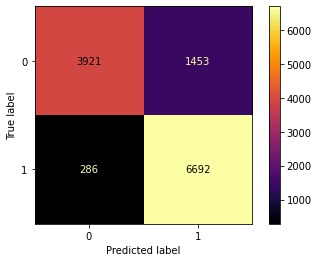

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, clf.predict(X_train), cmap="inferno")
plt.show()

## Classification Report

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      5374
           1       0.82      0.96      0.89      6978

    accuracy                           0.86     12352
   macro avg       0.88      0.84      0.85     12352
weighted avg       0.87      0.86      0.86     12352



In [103]:
data_test_raw['id'] = list(data_test_raw.index)

In [104]:
data_test_raw[['id','Offer Accepted']].to_csv('Datasets/submission.csv', index=None)